In [1]:
# Imports

import numpy as np
import matplotlib.pyplot as plt
from astropy.constants import h, c, k_B, b_wien

In [2]:
#constants

h = h.value # Planck's Constant
c = c.value # Speed of Light
k_B = k_B.value # Boltzmann's Constant
b_wien = b_wien.value

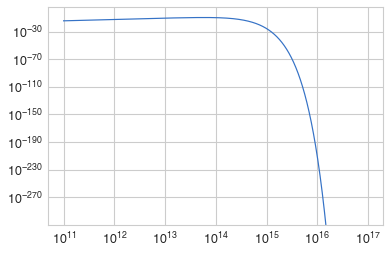

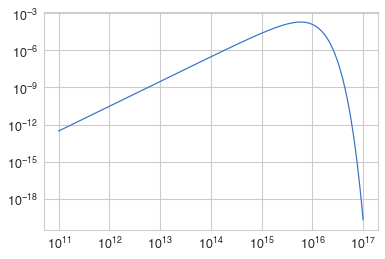

In [3]:
#Q1 - Part A

T1 = 1e3 # Temperature 1
T2 = 1e5 # Temperature 2
frequency = np.logspace(11, 17, 10000) # Create logarithmically spaced frequency vector

# Calculations
A = ( 2. * h * np.power(frequency, 3) ) / (c ** 2)
b1 = A * 1./( np.exp( h * frequency / ( k_B * T1 ) )  - 1)
b2 = A * 1./( np.exp( h * frequency / ( k_B * T2 ) )  - 1)

#Plotting
plt.figure()
plt.loglog(frequency, b1)
plt.show()

plt.figure()
plt.loglog(frequency, b2)
plt.show()

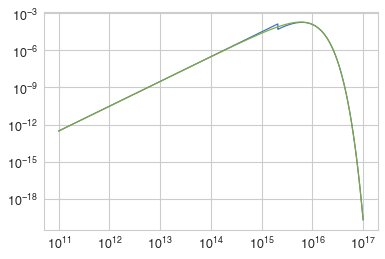

In [4]:
#Q1 - Part B
# Function for returning which approximation to use
def approx(freq, temp): 
    val = np.where( freq < ( k_B/h ) * temp, 2 * np.power(freq, 2) * k_B * temp / c**2, 2 * h * np.power(freq,3) * np.exp(-h * freq / (k_B * temp)) / c**2)
    return val

# Check for a given temperature T2
bApprox = approx(frequency, T2)

# Plotting
plt.figure()
plt.loglog(frequency, bApprox)
plt.loglog(frequency, b2)
plt.show()

In [5]:
#Q2

freq = np.logspace(12, 16, 1000) # Create a frequency vector (over what limits?)
T = np.power(10, np.arange(2,6)) # Create a temperature vector
tt, ff = np.meshgrid(T, freq) # Create a meshgrid of temperatures and frequencies
                              #over which B(nu) will be calculated

# Calculations
A = ( 2. * h * np.power(ff, 3) ) / (c ** 2)
exponential = np.exp( np.divide( h * ff, k_B * tt ) ) - 1
b =  A * np.divide(1, exponential)

# Findinf Maximum Frequency
maximaIdx = np.argmax(b, axis = 0)
maximaFreqs = freq[maximaIdx]

# Get the constant of proportionality
wienConstant = np.mean(np.divide(maximaFreqs, T))

# Print Wien's Constant
print(wienConstant)

58785566978.964386
